In [27]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data

%load_ext autoreload
%autoreload 1
%aimport data
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
b = Reservoir(n_res=400, input_scale=2, train_method='ridge', train_param=5,
                          weights_type='complex gaussian', random_projection='simulation',
                          activation_fun='binary', activation_param=1,
                          encoding_method='naivebinary', input_dim=1000, forget=100)

In [25]:
input_data, y = data.mackey_glass(sequence_length=2000)
b.fit(input_data, y)

Start of training...
Initialization finished. Elapsed time:
0.13045048713684082
100%|██████████| 2000/2000 [00:01<00:00, 1942.42it/s]
Iterations finished. Elapsed time:
1.1646251678466797
Training finished. Elapsed time:
1.48343825340271
Training score:
0.993992002122691


Reservoir(activation_fun='binary', activation_param=1,
     encoding_method='naivebinary', encoding_param=None, forget=100,
     input_dim=1000, input_scale=2, n_res=400, opu_transform=None,
     random_projection='simulation',
     random_state=<mtrand.RandomState object at 0x7f5f9472ebd0>,
     res_scale=1, save=0, train_method='ridge', train_param=5, verbose=1,
     weights_type='complex gaussian')

In [26]:
input_data, y = data.mackey_glass(sequence_length=1000)
pred_output, valid_score = b.score(input_data, np.ravel(y[:,b.forget:,:]))

Start of testing...
Initialization finished. Elapsed time:
0.03945302963256836
100%|██████████| 1000/1000 [00:00<00:00, 1836.38it/s]
Iterations finished. Elapsed time:
0.5878982543945312
Testing finished. Elapsed time:
0.5887002944946289
Testing finished. Elapsed time:
1.48343825340271
Testing score:
0.9862881741279051


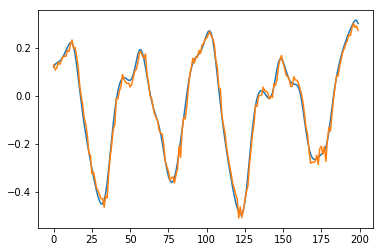

In [28]:
true_output = np.ravel(y[:, b.forget:, :])
pred_output = np.ravel(pred_output)

plt.plot(true_output[:200])
plt.plot(pred_output[:200])
plt.show()